<a href="https://colab.research.google.com/github/udghosh/Temp_hackathon/blob/main/Temp_Submission_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
data = pd.read_csv('train.csv')
data = pd.DataFrame(data)
data.head()

,date,temp
0,01-01-1980,4.16
1,02-01-1980,4.06
2,03-01-1980,7.12
3,04-01-1980,9.23
4,05-01-1980,3.20


In [ ]:
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['week'] = data['date'].dt.week
data['which_day'] = data['date'].dt.dayofweek
data['quarter'] = data['date'].dt.quarter

In [ ]:
data.head()

,date,temp,year,month,day,week,which_day,quarter
0,1980-01-01,4.16,1980,1,1,1,1,1
1,1980-02-01,4.06,1980,2,1,5,4,1
2,1980-03-01,7.12,1980,3,1,9,5,1
3,1980-04-01,9.23,1980,4,1,14,1,2
4,1980-05-01,3.20,1980,5,1,18,3,2


In [ ]:
data.groupby('year')['temp'].mean()

year
1980    14.685792
1981    14.380466
1982    15.323151
1983    15.024575
1984    14.168197
1985    15.139260
1986    14.543096
1987    15.545890
1988    14.870902
1989    15.737918
1990    16.450274
1991    15.836630
1992    15.509262
1993    15.028082
1994    16.151753
1995    15.743726
1996    15.074098
1997    15.866932
1998    16.076767
1999    16.329151
2000    15.893251
2001    15.709370
2002    15.987068
2003    15.425123
2004    16.707869
2005    15.554986
2006    15.784192
2007    16.070301
2008    15.914126
2009    16.009260
2010    16.234384
Name: temp, dtype: float64

In [ ]:
data.groupby('quarter')['temp'].mean()

quarter
1    10.264371
2    17.492347
3    21.257398
4    13.199260
Name: temp, dtype: float64

In [ ]:
data.groupby('month')['temp'].mean()

month
1      8.905016
2      9.935354
3     11.923642
4     15.267731
5     17.630000
6     19.574720
7     21.925369
8     22.311811
9     19.477602
10    16.330676
11    13.062613
12    10.200083
Name: temp, dtype: float64

In [ ]:
holder1 = data.groupby('month')['temp'].max()
holder2 = data.groupby('month')['temp'].min()
print("max:", holder1, "\nmin:", holder2)

max: month
1     30.21
2     31.51
3     31.64
4     31.17
5     29.67
6     30.72
7     32.39
8     31.73
9     30.66
10    29.75
11    29.56
12    29.18
Name: temp, dtype: float64 
min: month
1    -2.05
2    -2.42
3    -1.80
4    -3.15
5    -1.68
6    -2.75
7    -5.11
8    -3.56
9    -2.33
10   -0.99
11    1.40
12    0.50
Name: temp, dtype: float64


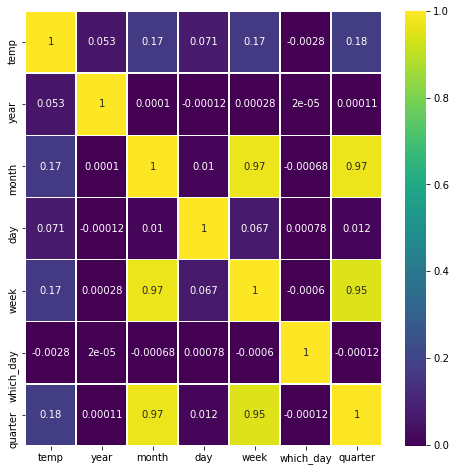

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:
final_data = data.copy()

In [ ]:
final_data1 = final_data.drop(['week', 'which_day'], axis = 1)

In [ ]:
final_data2 = final_data.drop(['week'], axis = 1)

In [ ]:
y = final_data['temp']
x_final2 = final_data1.drop(['temp', 'date'], axis = 1)

x_train ,x_test, Y_train, Y_test = train_test_split(x_final2, y, test_size = 0.2, random_state=0)

In [ ]:
y = final_data['temp']
x_final22 = final_data2.drop(['temp', 'date'], axis = 1)

X_train ,X_test, y_train, y_test = train_test_split(x_final22, y, test_size = 0.2, random_state=0)


random_model1 = RandomForestRegressor(n_estimators=500) #max_depth=35)

#Fit
random_model1.fit(X_train, y_train)

y_pred1 = random_model1.predict(X_test)

#Checking the accuracy
random_model_accuracy1 = round(random_model1.score(X_train, y_train)*100,2)
print(round(random_model_accuracy1,2),'%')

99.06 %


In [ ]:
random_model_accuracy1 = round(random_model1.score(X_test, y_test)*100,2)
print(round(random_model_accuracy1,2),'%')

92.68 %


In [ ]:
mse = mean_squared_error(Y_test, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

2.1184728761636022


In [ ]:
random_model1 = RandomForestRegressor(n_estimators=500)
#Fit
random_model1.fit(x_train, Y_train)

y_pred1 = random_model1.predict(x_test)

#Checking the accuracy
random_model_accuracy1 = round(random_model1.score(x_train, Y_train)*100,2)
print(round(random_model_accuracy1,2),'%')

99.18 %


In [ ]:
random_model_accuracy1 = round(random_model1.score(x_test, Y_test)*100,2)
print(round(random_model_accuracy1,2),'%')

93.44 %


In [ ]:
mse = mean_squared_error(Y_test, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

2.0055892544007974


## Creating the prediction csv

In [ ]:
test_data = pd.read_csv('test.csv')
test_data = pd.DataFrame(test_data)
test_data.head(1)

In [ ]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [ ]:
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day

In [ ]:
test_data1 = test_data.drop(['date'], axis = 1)

y_pred = random_model1.predict(test_data1)

y_pred

In [ ]:
prediction = pd.Series(y_pred)
prediction.head()